<a href="https://colab.research.google.com/github/siddharth-0704/VGG_classifier/blob/main/VGG_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddharth0704panda","key":"75532769cf5fa893b3e372158de2cd4c"}'}

In [34]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [35]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 55% 81.0M/149M [00:00<00:00, 842MB/s]
100% 149M/149M [00:00<00:00, 500MB/s] 


In [36]:
!unzip -q brain-tumor-mri-dataset.zip

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [42]:
img_size = (150, 150)
batch_size = 32

# Define paths to your dataset
train_dir = '/content/Training'
test_dir = '/content/Testing'

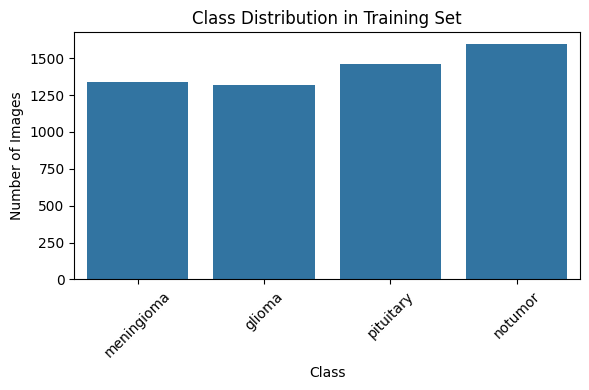

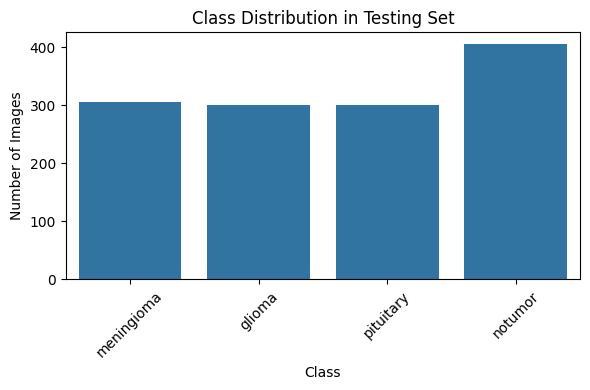

In [47]:
def plot_class_distribution(directory, title):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))

    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title(f'Class Distribution in {title}')
    plt.ylabel('Number of Images')
    plt.xlabel('Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_dir, 'Training Set')
plot_class_distribution(test_dir, 'Testing Set')

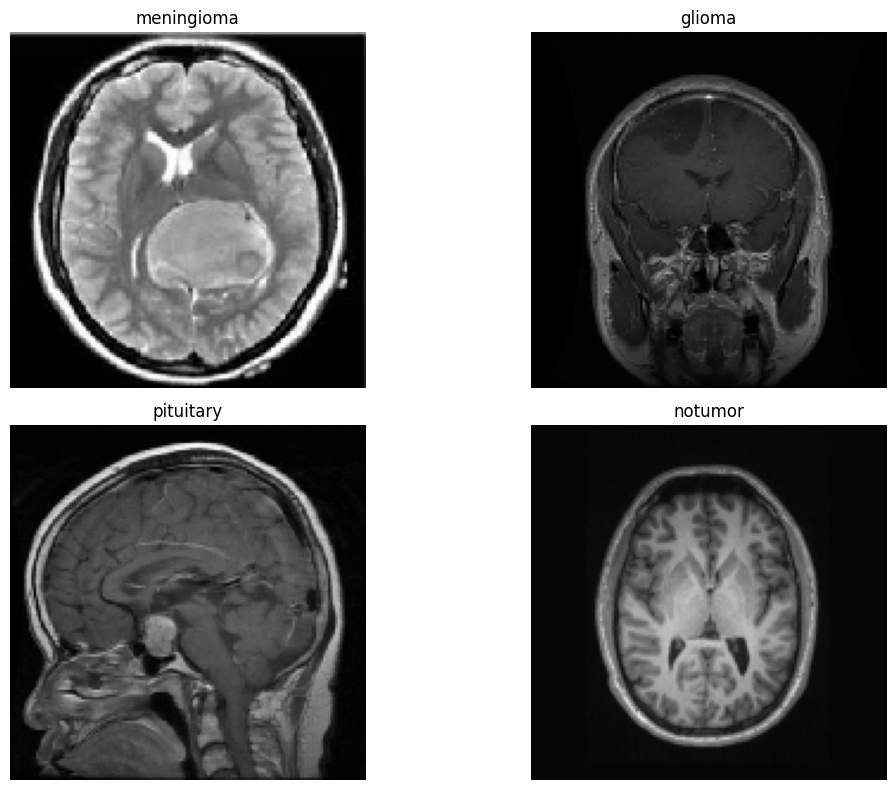

In [48]:
def show_sample_images(directory):
    plt.figure(figsize=(12, 8))
    class_names = os.listdir(directory)
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(directory, class_name)
        image_file = os.listdir(class_path)[0]
        image_path = os.path.join(class_path, image_file)
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images(train_dir)

In [49]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for confusion matrix
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_size + (3,)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.6124 - loss: 0.8718 - val_accuracy: 0.7910 - val_loss: 0.5187
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.8859 - loss: 0.3213 - val_accuracy: 0.8841 - val_loss: 0.3118
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.9433 - loss: 0.1762 - val_accuracy: 0.8848 - val_loss: 0.3055
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9659 - loss: 0.1092 - val_accuracy: 0.9458 - val_loss: 0.1625
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.9816 - loss: 0.0533 - val_accuracy: 0.9260 - val_loss: 0.2046


In [52]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 492ms/step


Classification Report:
              precision    recall  f1-score   support

      glioma       0.84      0.97      0.90       300
  meningioma       0.95      0.75      0.84       306
     notumor       0.97      0.97      0.97       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.93      1311
   macro avg       0.93      0.92      0.92      1311
weighted avg       0.93      0.93      0.92      1311



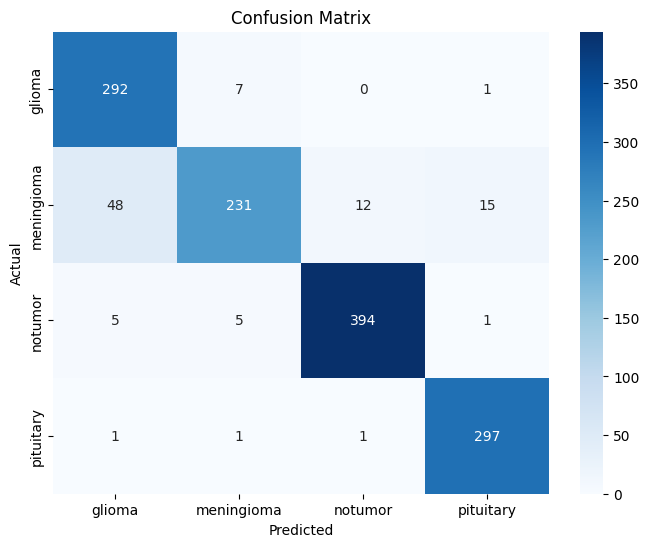

In [53]:
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()